<a href="https://colab.research.google.com/github/chandanareddyyn/Bike-sharing-demand-prediction/blob/main/Bike_Sharing_Demand_Prediction(SL)_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [2]:
#import statements
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import  mean_absolute_error
from sklearn.metrics import  log_loss

from datetime import datetime
import datetime as dt

import warnings
warnings.filterwarnings('ignore')


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
bike_df=pd.read_csv('/content/SeoulBikeData.csv',encoding='latin')

In [ ]:
bike_df.head()

In [ ]:
bike_df.tail()

In [ ]:
bike_df.columns

In [ ]:
#Getting the shape of dataset with rows and columns
bike_df.shape

This Dataset contains 8760 lines and 14 columns.
In a day we have 24 hours and we have 365 days a year so 365 multiplied by 24 = 8760, which represents the number of line in the dataset.

In [ ]:
bike_df.info()

In [ ]:
bike_df.describe().T

In [ ]:
bike_df.nunique()

**Preprocessing Data Set**

**Duplicate values**

In [ ]:
Dup=len(bike_df[bike_df.duplicated()])
print("Number of duplicate value is=",Dup)

**Missing values**

**Why do we need to handle missing values?**

The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first

In [ ]:
bike_df.isna().sum()
bike_df.isnull().sum()

*There is no missing values and duplicate values present in the dataset*

**Display the column names**

In [ ]:
bike_df.columns

**Rename the column names**

In [15]:
bike_df=bike_df.rename(columns={'Rented Bike Count':'Rented_bike_count',
                                'Humidity(%)':'Humidity',
                                'Temperature(°C)':'Temperature',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_day'})

In [ ]:
bike_df

****Breaking date column****

*Python read "Date" column as a object type basically it reads as a string, as the date column is very important to analyze the users behaviour so we need to convert it into datetime format then we split it into 3 column i.e 'year', 'month', 'day'as a category data type.*

In [17]:
# Changing the "Date" column into three parts "year","month","day" column
bike_df['Date'] = bike_df['Date'].apply(lambda x: 
                                   dt.datetime.strptime(x,"%d/%m/%Y"))

In [18]:
bike_df['year'] = bike_df['Date'].dt.year
bike_df['month'] = bike_df['Date'].dt.month
bike_df['day'] = bike_df['Date'].dt.day_name()

In [19]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
bike_df['weekdays_weekend']=bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=bike_df.drop(columns=['Date','day','year'],axis=1)

In [ ]:
bike_df.info()


In [ ]:
bike_df['weekdays_weekend'].value_counts()

**Changing data type**

*As "Hour","month","weekdays_weekend" columns are shown as  integer data type but actually those are category data type. so we need to change this data type. if not, then while doing the further anlysis and correlation with this the values will not be actually true so we can mislead by this.*

In [22]:
#Change the int64 column into catagory column
cols=['Hour','month','weekdays_weekend']
for col in cols:
  bike_df[col]=bike_df[col].astype('category')

In [ ]:
#let's display the columns
bike_df.columns

In [ ]:
#let's check the result of data type
bike_df.info()

In [ ]:
bike_df['weekdays_weekend'].unique()

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=bike_df,x='month',y='Rented_bike_count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes VS Month ')


**weekdays_weekend**

In [ ]:
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=bike_df,x='weekdays_weekend',y='Rented_bike_count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes on weekdays and weekend ')

[Text(0.5, 1.0, 'Count of Rented bikes on weekdays_weekend with respect to peak hours')]

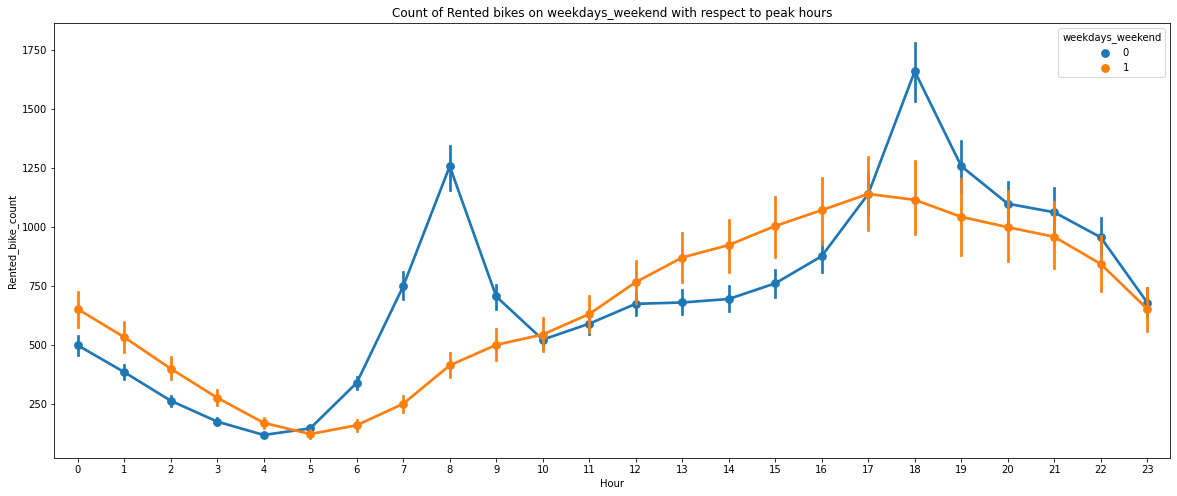

In [35]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented_bike_count',hue='weekdays_weekend',ax=ax)
ax.set(title='Count of Rented bikes on weekdays_weekend with respect to peak hours')

In [ ]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented_bike_count',hue='Functioning_day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=bike_df,x='Seasons',y='Rented_bike_count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=bike_df,x='Holiday',y='Rented_bike_count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

# Analyze of Numerical variables distplots

In [ ]:
#assign the numerical coulmn to variable
numerical_columns=list(bike_df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

In [ ]:
#printing displots to analyze the distribution of all numerical features
for col in numerical_features:
  plt.figure(figsize=(10,6))
  sns.distplot(x=bike_df[col])
  plt.xlabel(col)
plt.show()

#### Numerical vs.Rented_Bike_Count

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Temperature" 
bike_df.groupby('Temperature').mean()['Rented_bike_count'].plot()


In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Solar_Radiation" 
bike_df.groupby('Solar_radiation').mean()['Rented_bike_count'].plot()


In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Snowfall" 
bike_df.groupby('Snowfall').mean()['Rented_bike_count'].plot()


In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Rainfall" 
bike_df.groupby('Rainfall').mean()['Rented_bike_count'].plot()


In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Wind_speed" 
bike_df.groupby('Wind_speed').mean()['Rented_bike_count'].plot()

In [ ]:
#printing the regression plot for all the numerical features
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=bike_df[col],y=bike_df['Rented_bike_count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

In [ ]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('Rented_bike_count')
plt.ylabel('Density')
ax=sns.distplot(bike_df['Rented_bike_count'],hist=True ,color="y")
ax.axvline(bike_df['Rented_bike_count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(bike_df['Rented_bike_count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

In [ ]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented_bike_Count')
sns.boxplot(x=bike_df['Rented_bike_count'])
plt.show()

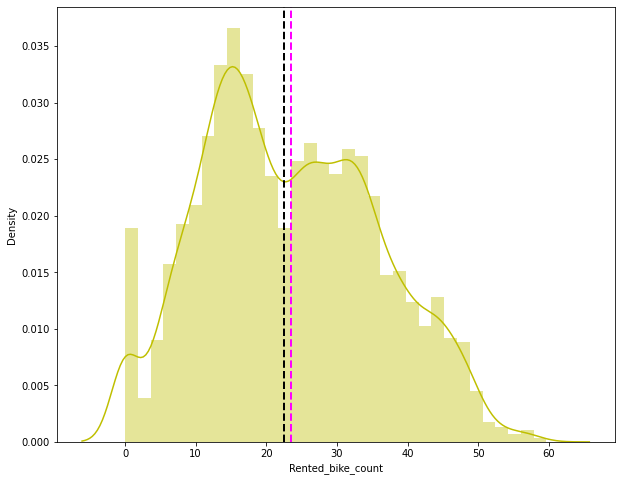

In [69]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented bike count')
plt.ylabel('Density')
ax=sns.distplot(np.sqrt(bike_df['Rented_bike_count']), color="y")
ax.axvline(np.sqrt(bike_df['Rented_bike_count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(bike_df['Rented_bike_count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

**Since we have generic rule of applying Square root for the skewed variable in order to make it normal .After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution.**

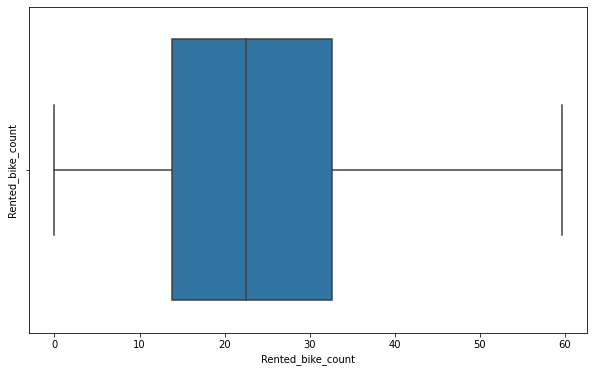

In [70]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers 
plt.figure(figsize=(10,6))

plt.ylabel('Rented_bike_count')
sns.boxplot(x=np.sqrt(bike_df['Rented_bike_count']))
plt.show()

In [71]:
bike_df.corr()


,Rented_bike_count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_radiation,Rainfall,Snowfall
Rented_bike_count,1.000000,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Temperature,0.538558,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity,-0.199780,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind_speed,0.121108,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility,0.199280,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew_point_temperature,0.379788,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar_radiation,0.261837,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,-0.123074,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,-0.141804,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


**After applying Square root to the Rented Bike Count column, we found that there is no outliers present.**

# Checking of Correlation between variables

# Checking in OLS Model

**Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable**

In [ ]:
#import the module
#assign the 'x','y' value
import statsmodels.api as sm
X = bike_df[[ 'Temperature','Humidity',
       'Wind_speed', 'Visibility','Dew_point_temperature',
       'Solar_radiation', 'Rainfall', 'Snowfall']]
Y = bike_df['Rented_bike_count']
bike_df.head()

In [ ]:
#add a constant column
X = sm.add_constant(X)
X

In [ ]:
## fit a OLS model 

model= sm.OLS(Y, X).fit()
model.summary()



* R sqauare and Adj Square are near to each other. 40% of 
variance in the Rented Bike count is explained by the model.

* For F statistic , P value is less than 0.05 for 5% levelof significance.

* P value of dew point temp and visibility are very high and they are not significant.

* Omnibus tests the skewness and kurtosis of the residuals. Here the value of Omnibus is high., it shows we have skewness in our data.

* The condition number is large, 3.11e+04. This might indicate that there are strong multicollinearity or other numerical problems

* Durbin-Watson tests for autocorrelation of the residuals. Here value is less than 0.5. 
* We can say that there exists a positive auto correlation among the variables.


In [75]:
X.corr()

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_radiation,Rainfall,Snowfall
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,NaN,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity,NaN,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind_speed,NaN,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility,NaN,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew_point_temperature,NaN,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar_radiation,NaN,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,NaN,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,NaN,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


In [64]:
X=bike_df
Y=bike_df

In [65]:
#splitting data set into training set and test set
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [66]:
X_train.shape

(7008, 15)

In [67]:
X_test.shape

(1752, 15)

In [68]:
#feature scaling

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


ValueError: ignored